In [142]:
import pandas as pd
from numpy import arange
import math 
import matplotlib.pyplot as plt
import numpy as np

TARGET_FILE = 'final.csv'

def pearson_coefficient(df):
    return df[df.columns[0]].corr(df[df.columns[1]])


def entropy(probs):
    return -probs.dot(np.log2(probs))


def mutual_info(dataframe):
    Hx = entropy(dataframe.iloc[:,0].value_counts(normalize=True, sort=False))
    Hy = entropy(dataframe.iloc[:,1].value_counts(normalize=True, sort=False))
    
    counts = dataframe.groupby([dataframe.columns[0],dataframe.columns[1]]).size()
    probs = counts/ counts.values.sum()
    H_xy = entropy(probs)

    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy) 
    
    return {'Hx':Hx,'Hy':Hy,'MI':MI,'NMI':NMI} 

In [143]:
file = pd.read_csv(TARGET_FILE, encoding = "ISO-8859-1")

test_data = file.loc[file["VCE Median Study Score"] >= 0]

med_income_vs_med_score = pd.DataFrame({"Median Income":test_data["Median Income in Postcode"], "VCE Median Study Score": test_data["VCE Median Study Score"]})

med_income_vs_40_score = pd.DataFrame({"Median Income":test_data["Median Income in Postcode"], "Percentage of study scores of 40 and over":test_data["Percentage of study scores of 40 and over"]})

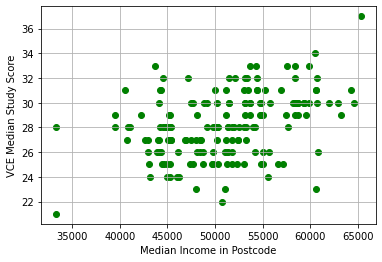

The Pearson Coefficient r is:
 0.3979223971750898


The Mutal Information are:
 {'Hx': 6.983556242918115, 'Hy': 3.359504209083065, 'MI': 3.018775188577271, 'NMI': 0.898577587852229}


In [144]:
plt.scatter(med_income_vs_med_score["Median Income"],med_income_vs_med_score["VCE Median Study Score"], color = "green")
plt.grid(True)
plt.xlabel("Median Income in Postcode")
plt.ylabel("VCE Median Study Score")
plt.show()


pear_coe_1 = test_data["Median Income in Postcode"].corr(test_data["VCE Median Study Score"])
mut_inf_1 = mutual_info(med_income_vs_med_score)
print("The Pearson Coefficient r is:\n", pear_coe_1)
print("\n");
print("The Mutal Information are:\n", mut_inf_1)

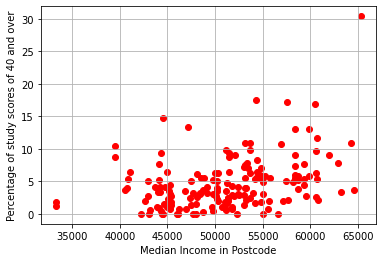

The Pearson Coefficient r is:
 0.37885997431313806


The Mutal Information are:
 {'Hx': 6.983556242918115, 'Hy': 6.143133548670822, 'MI': 5.708837276703043, 'NMI': 0.9293037879565963}


In [148]:
plt.scatter(med_income_vs_40_score["Median Income"],med_income_vs_40_score["Percentage of study scores of 40 and over"], color = "red")
plt.grid(True)
plt.xlabel("Median Income in Postcode")
plt.ylabel("Percentage of study scores of 40 and over")
plt.show()


pear_coe_2 = test_data["Median Income in Postcode"].corr(test_data["Percentage of study scores of 40 and over"])
mut_inf_2 = mutual_info(med_income_vs_40_score)
print("The Pearson Coefficient r is:\n", pear_coe_2)
print("\n");
print("The Mutal Information are:\n", mut_inf_2)